# Lab 2: Ice Flux Divergences

### Load data from the csv file you generated

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Topography

Let's have a little practice time! Loading and plotting data is a very useful skill, no matter what major you has and what fields you want to work in. Now, as we have the convenient csv file from Lab 1, lets load data

__Q1: Load the csv file into a pandas dataframe. Plot following data: ice velocity magnitude, surface mass balance, surface elevation change rate, ice surface elevation__

hint: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html, scroll down to the bottom

### Continuity & Flux

https://www.khanacademy.org/science/ap-college-physics-1/xf557a762645cccc5:fluids/xf557a762645cccc5:fluid-flow/a/what-is-volume-flow-rate

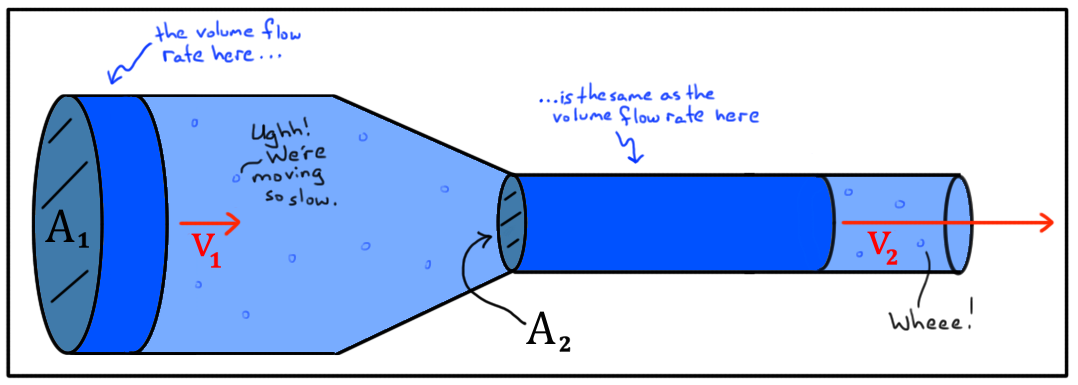

Read through the material, lets do a little mathematical check-in

Water flows steadily through a pipe. At the inlet (where water enter the pipe), the pipe has a diameter of 0.20 m, and the velocity of water is 1.5 m/s. At the exit, the velocity of water increases to 3.0 m/s.

Question: What is the required diameter of the pipe outlet so that the flow is conserved?

In [ ]:
pipe_radius_inlet = 0.2
velocity_inlet = 1.5
pipe_area_inlet = 
flux_inlet = #water volume pass the inlet cross section per second

velocity_outlet = 3
flux_outlet = 
pipe_area_outlet = 

Answer: pipe_area_outlet = 0.157 m^2. Please show calculation steps in code

### Ice Flux Divergence

Now lets imagine a column of ice, where the base of the column is a 500 meter by 500 meter square. Assume the ice has a uniform flow in and out of this grid. That is, the velocity of ice didn't change with depth

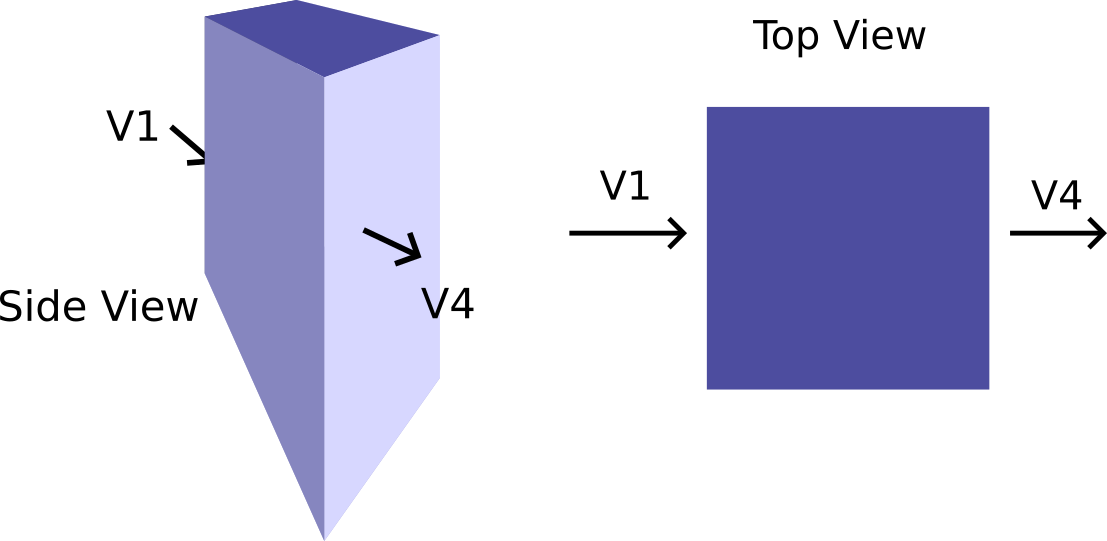

__Q2: what is relationship between v1 (velocity in) and v4 (velocity out) if this column of ice do have have external mass added or substracted and do not have changes in surface elevation?__ Answer in a simple equation

Answer:

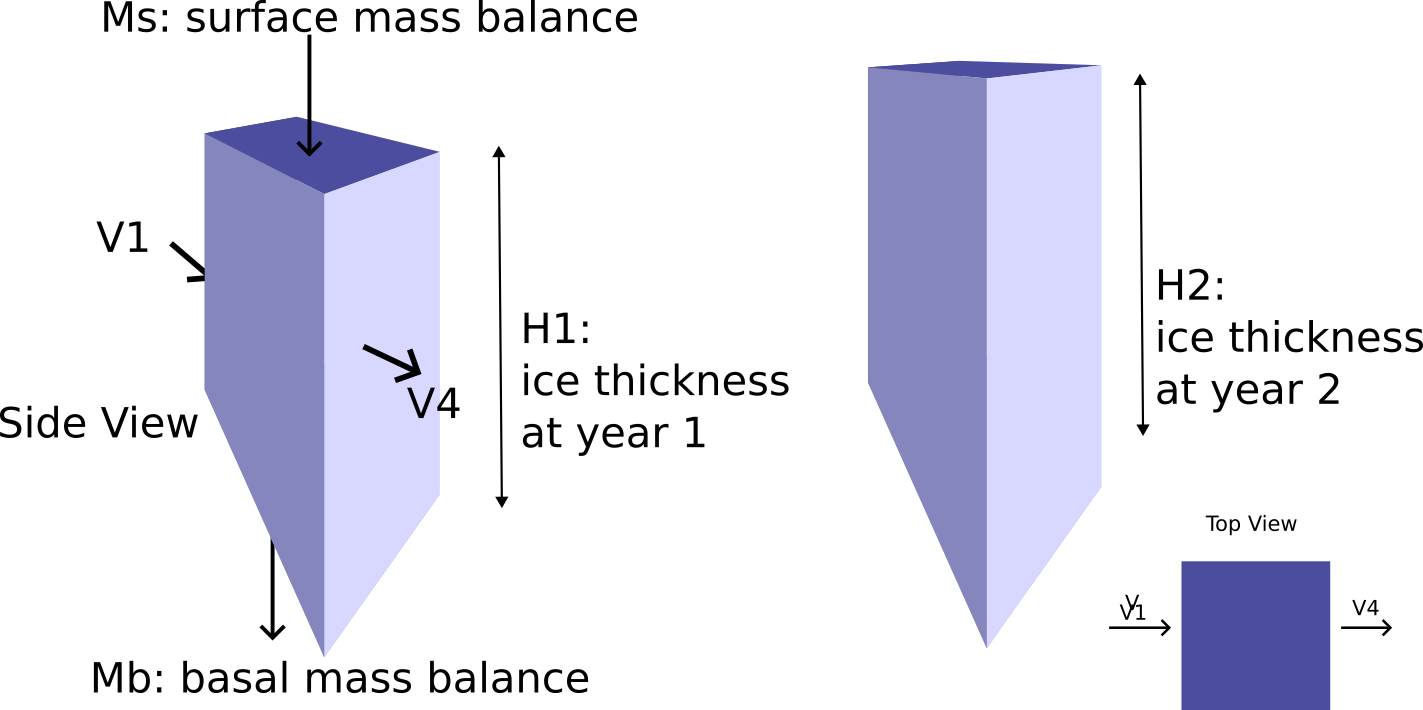

__Challenge! (Optional)__

__What is the relationship between v1, v4, Ms, Mb, H1, and H2?__ Answer in words or in formula

### Calculating Mass Flux Residuals

This is the function to calculate the mass flux residuals. Read the function

In [42]:
""" compute the mass conservation residual from topography

Args:
    bed (2D numpy array of float): the elevation of the subglacial topography, in units of meters
    surf (2D numpy array of float): the elevation of the ice surface, in unit of meters
    velx (2D numpy array of float): velocity in the x-direction, in unit of meters per year
    vely (2D numpy array of float): velocity in the y-direction, in unit of meters per year
    dhdt (2D numpy array of float): rate of changes of surface elevation, in unit of meters per year
    smb (2D numpy array of float): annual surface mass balance, in unit of ice-equivalent meters per year
    resolution (int): resolution of the grid.
Returns:
    res: mass conservation residual given the input parameters
"""
def get_mass_conservation_residual(bed, surf, velx, vely, dhdt, smb, resolution):
    thick = surf - bed
    
    dx = np.gradient(velx*thick, resolution, axis=1)
    dy = np.gradient(vely*thick, resolution, axis=0)
    
    res = dx + dy + dhdt - smb
    
    return res

__Q4: read the function, and describe what is the input, and what is the output. Describe the unit of the output (e.g. meters, meters per year, meter-squared per year, etc.))__

Answer:

In [35]:
df = pd.read_csv('YourGlacierNameDataGridded.csv')

In [46]:
xx, yy = np.meshgrid(np.unique(df.x), 
                     np.unique(df.y))

surf = df['surf'].values.reshape(xx.shape)
bedmap_bed = df['bedmap_bed'].values.reshape(xx.shape)
velx = df['velx'].values.reshape(xx.shape)
vely = df['vely'].values.reshape(xx.shape)
dhdt = df['dhdt'].values.reshape(xx.shape)
smb = df['smb'].values.reshape(xx.shape)

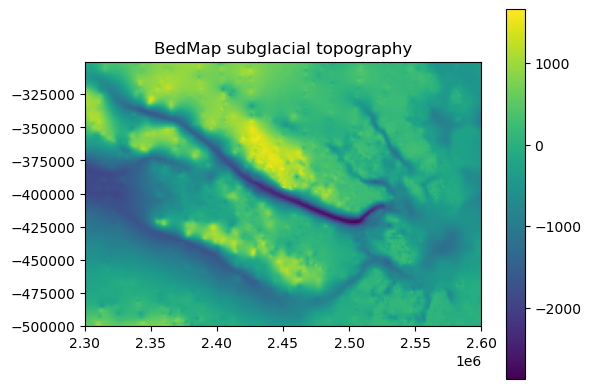

In [58]:
plt.pcolormesh(xx,yy,bedmap_bed)
plt.title('BedMap subglacial topography')
plt.axis('scaled')
plt.colorbar()

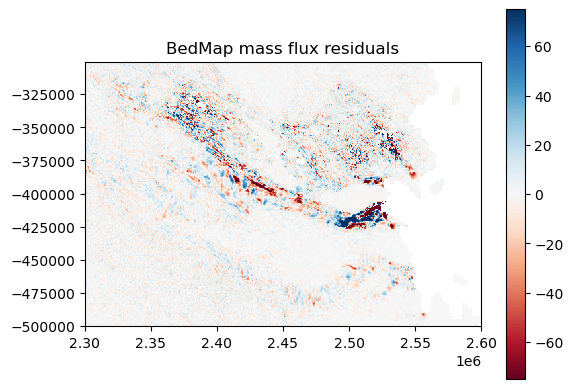

In [59]:
resolution = 500
bedmap_residual = get_mass_conservation_residual(bedmap_bed, surf, velx, vely, dhdt, smb, resolution)

plt.pcolormesh(xx,yy,bedmap_residual,cmap='RdBu',vmax=75,vmin=-75)
plt.title('BedMap mass flux residuals')
plt.axis('scaled')
plt.colorbar()

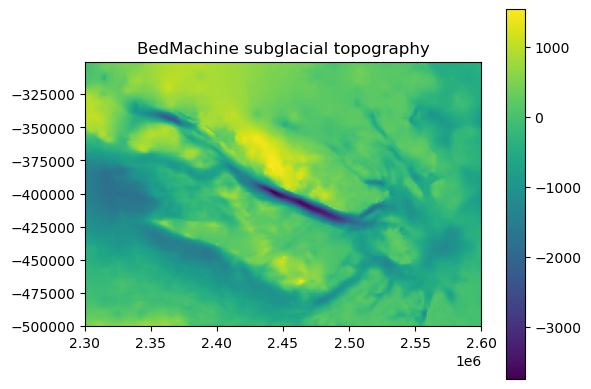

In [60]:
bedmachine_bed = surf - bedmachine_thickness

plt.pcolormesh(xx,yy,bedmachine_bed)
plt.title('BedMachine subglacial topography')
plt.axis('scaled')
plt.colorbar()

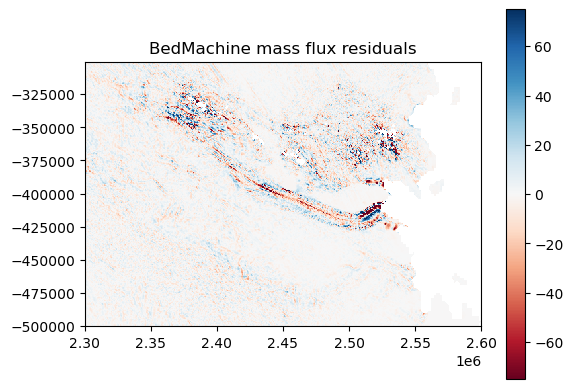

In [61]:
resolution = 500
bedmachine_residual = get_mass_conservation_residual(bedmachine_bed, surf, velx, vely, dhdt, smb, resolution)

plt.pcolormesh(xx,yy,bedmachine_residual,cmap='RdBu',vmax=75,vmin=-75)
plt.title('BedMachine mass flux residuals')
plt.axis('scaled')
plt.colorbar()

__Q5: What is the difference between the mass flux residuals from BedMap and the mass flux residuals from BedMachine? Why this difference exists?__

Answer: